## Word Embedding using Word2Vec

In [ ]:
!pip install nltk
!pip install gensim

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 

sample = open("alice.txt", "r") 
s = sample.read() 

In [ ]:
import nltk
nltk.download('punkt')
# Replaces escape character with space 
f = s.replace("\n", " ") 
data = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data.append(temp) 

In [ ]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							size = 100, window = 5) 
# Print results 
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ", 
	model1.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ", 
	model1.similarity('alice', 'machines')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
											window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ", 
	model2.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ", 
	model2.similarity('alice', 'machines')) 

Output indicates the cosine similarities between word vectors ‘alice’, ‘wonderland’ and ‘machines’ for different models. One interesting task might be to change the parameter values of ‘size’ and ‘window’ to observe the variations in the cosine similarities.
 

Applications of Word Embedding :

>> Sentiment Analysis
>> Speech Recognition
>> Information Retrieval
>> Question Answering

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]


In [ ]:
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)


Word2Vec(vocab=14, size=100, alpha=0.025)


In [ ]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)


['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [ ]:
# access vector for one word
print(model['sentence'])


[ 3.4106869e-04 -4.5456402e-03  2.3128440e-04  3.2806846e-03
 -3.5690637e-03  2.9898514e-03  2.9056557e-04  4.6205055e-03
 -1.2941610e-03 -2.6427147e-03  2.6496465e-03 -2.8199060e-03
 -1.1150349e-03 -1.1465411e-03 -2.2922368e-03  4.4184821e-03
  4.4216667e-03  2.5042901e-03  1.7073205e-03 -4.3914891e-03
  3.9929217e-03  5.4031209e-04  1.7971246e-03  3.3046834e-03
  3.3916102e-03 -3.4657035e-03 -2.2424015e-03 -2.7923456e-03
 -1.2726992e-03 -4.3682070e-03  4.5121629e-03 -4.7853845e-03
 -3.9624707e-03  3.1274449e-05 -3.9940206e-03  1.8193731e-03
 -4.7571128e-03 -4.8104064e-03  3.3455254e-03 -3.1689673e-03
 -2.4479884e-03 -3.9328118e-03 -1.4700662e-04 -3.0781105e-03
 -3.8183450e-03  4.2802230e-03 -3.1567491e-03 -3.6291236e-03
 -4.4657341e-03 -2.6195850e-03 -4.8604915e-03 -4.6903780e-03
 -2.5054300e-03  1.0823839e-03  3.2381434e-03 -1.9785785e-03
  3.0018114e-03 -4.9564289e-03 -4.5719189e-03  4.9600899e-03
 -4.9074749e-03 -2.8576332e-03 -1.7751334e-03  1.8686668e-03
  1.5865755e-03 -1.88372

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


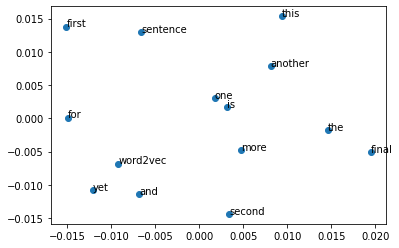

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [ ]:
!python3 -m spacy download en_core_web_sm
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0MB 3.4MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp36-none-any.whl size=12011740 sha256=ece180cbbad8aea473412133fc979e889cdb6de5101fec2468260748a41b1522
  Stored in directory: /tmp/pip-ephem-wheel-cache-0gio1fio/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp36-none-any.whl size=12019126 sha256=60d27563e7b01e1e04a7b1edf6fda62c841342175ca3b59c4b05d71ee0dc688e
  Stored in directory: /root/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d217

In [ ]:
#!python3 -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
nlp(u'lion').vector.shape

(96,)

In [ ]:
doc = nlp(u'The quick brown fox jumped over the lazy dogs.')

doc.vector.shape

(96,)

In [ ]:
# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.3682379
lion pet 0.17687276
cat lion 0.3682379
cat cat 1.0
cat pet 0.38982964
pet lion 0.17687276
pet cat 0.38982964
pet pet 1.0


/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

In [ ]:
# Create a three-token Doc object:
tokens = nlp(u'like love hate')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

like like 1.0
like love 0.21975423
like hate 0.028223615
love like 0.21975423
love love 1.0
love hate 0.3308294
hate like 0.028223615
hate love 0.3308294
hate hate 1.0


/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

In [ ]:
tokens = nlp(u'dog cat nargle')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 19.528912 True
cat True 19.71323 True
123 True 22.212702 True
